Импорт нужных функций

In [356]:
import matplotlib.pyplot as plt #рисование графиков
from scipy.stats import chi2, norm #распеределение которое мы будем использовать и нормальное
from math import sqrt #квадратный корень
from collections import OrderedDict #для сортировки dictionary по ключу. 

Для реализации центральной предельной теоремы я выбрал распределение $\chi^{2}$ [Подробно на википедии](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D1%85%D0%B8-%D0%BA%D0%B2%D0%B0%D0%B4%D1%80%D0%B0%D1%82)
Для генерации нужен один параметр, назовем его df. Перед началом определим его и другие параметры.

In [357]:
df = 5 #Параметр для генерации выборки
r = 1000 #кол-во повторений для генерации выборочного среднего
N = [5, 10, 50] # n для которых мы будем строить выборочное среднее

Определяем распределение и получаем его параметры(математическое ожидание(mean) и дисперсию(var)). Подробно о работе с распределением можно почитать в [документации](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html)

In [358]:
chi2 = chi2(df) #распеределение
mean = chi2.mean() #математическое ожидание
var = chi2.var() #дисперсия

Далее генерим выборку в 1000. На графике рисуем гистограмму выборки и теоритическую функцию плотности распределения. 

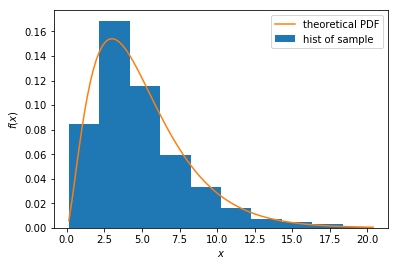

In [359]:
sample = chi2.rvs(size = 1000) #генерация выборки
plt.hist(sample, normed=True, label = 'hist of sample') 

x = np.linspace(min(sample), max(sample), 100) #генерация значений для графика плотности распределения
plt.plot(x, chi2.pdf(x), label = 'theoretical PDF')

plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper right')
plt.show()

Опередилим функцию, которая будет возвращать набор выборочных средних, посчитанных по сгененрированным выборкам размера n.  


In [360]:
def CLT(n, r, rasp):    
    result = [] 
    for i in range(r):        
        sample = rasp.rvs(size = n) # генерируем выборку        
        Xsr = sum(sample)/n #считаем среднее
        result.append(Xsr) #присоединяем к массиву          
    return result #возвращаем набор выборочных средних в виде массива

In [361]:
Xsr = dict(zip(N, [CLT(n, r, chi2) for n in N])) #создаем словарь в виде n - набор выборочных средних

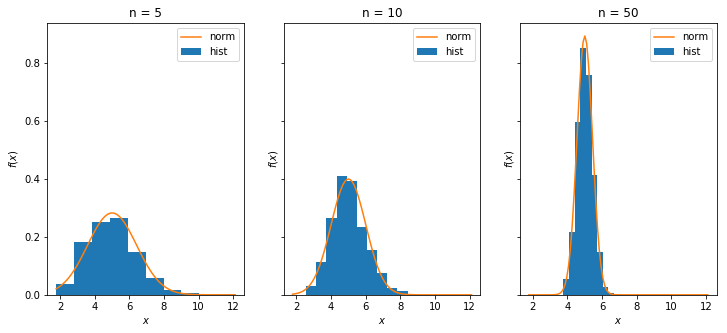

In [362]:
x_start = min([min(X) for X in Xsr.values()]) # рассчитываем минимальный x для генерации нормального распределения
x_stop = max([max(X) for X in Xsr.values()]) # рассчитываем максимальный x для генерации нормального распределения
x = linspace(x_start, x_stop, 100) # создаем набор x для генерации нормального распределения
f, schemes = plt.subplots(1, 3, sharey=True, figsize=(12, 5)) # опеределяем вид графика, 1 ряд, 3 колонки, общиая ось Y, размер

#делаем цилк, которые генерит нормальное распределение и заполняет информацию о графике для всех n
i = 0
for n, X in OrderedDict(sorted(Xsr.items())).iteritems(): #перебираем словарь после сортировки по n
    norm_rv = norm(mean, sqrt(var/n)) #определение нормального распределения. Прямо тут рассчитываем стандартное отклонение
    schemes[i].set_title('n = {0}'.format(n))
    schemes[i].hist(X, normed=True, label = 'hist') #отображение выборки
    schemes[i].plot(x, norm_rv.pdf(x),  label = 'norm') #отображение нормального распределения 
    schemes[i].legend(loc='upper right')
    schemes[i].set_ylabel('$f(x)$')
    schemes[i].set_xlabel('$x$')
    i = i + 1

plt.show()

## Вывод:  С ростом n распеределение сужается. Оно стремится к яроковыраженному нормальному распеределению. Так же мы видим, что распределение совпадает с теоретическим, что говорит, что центральная предельная теорема работает :)